In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.time_series_model_training import *

In [3]:
forecaster = TimeSeriesForecaster("../data/cleaned_TSLA.csv")

In [4]:
TSLA_df = forecaster._load_data()

In [5]:
forecaster.split_data()

In [6]:
xs, ys = forecaster.create_sequences(TSLA_df, 90)

In [7]:
forecaster.train_arima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8133.901, Time=0.99 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8142.039, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8142.148, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8133.702, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8140.101, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8140.166, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8138.397, Time=1.93 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8141.549, Time=0.21 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 8.002 seconds


In [8]:
forecaster.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-6826.156, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-7447.686, Time=0.96 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=2.86 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-6843.397, Time=0.28 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-7679.738, Time=1.27 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=4.87 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=3.25 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-7669.462, Time=0.87 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-7679.577, Time=2.07 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-7678.497, Time=3.31 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-7680.373, Time=1.43 sec
 ARIMA(0,1,1)(1,1,0)[5]             : AIC=-7449.391, Time=0.35 sec
 ARIMA(0,1,1)(2,1,1)[5]             : AIC=inf, Time=3.87 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=inf, Time=3.49 sec
 ARIMA(0,1,2)(2,1,0)[5]             : AIC=-7678.6

In [9]:
forecaster.train_lstm()

c:\Users\Ashis\Desktop\KAIM Program 2\week_11\week_11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0113 - val_loss: 0.0328
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0015 - val_loss: 0.2562
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0013 - val_loss: 0.0311
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0014 - val_loss: 0.0295
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.8317e-04 - val_loss: 0.0176
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0010 - val_loss: 0.0225
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 7.5377e-04 - val_loss: 0.0171
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.9333e-04 - val_loss: 0.0164
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 9.4857e-04 - val_loss: 0.0138
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0010 - val_loss: 0.0139
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 9.4338e-04 - val_loss: 0.0127
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 4

In [10]:
forecaster.make_predictions()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


In [11]:
forecaster.evaluate_models()

Shape of test_data for ARIMA: (403,)
Shape of predictions for ARIMA: (403,)
Shape of test_data for SARIMA: (403,)
Shape of predictions for SARIMA: (403,)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Shape of test_data for LSTM: (403,)
Shape of predictions for LSTM: (403,)


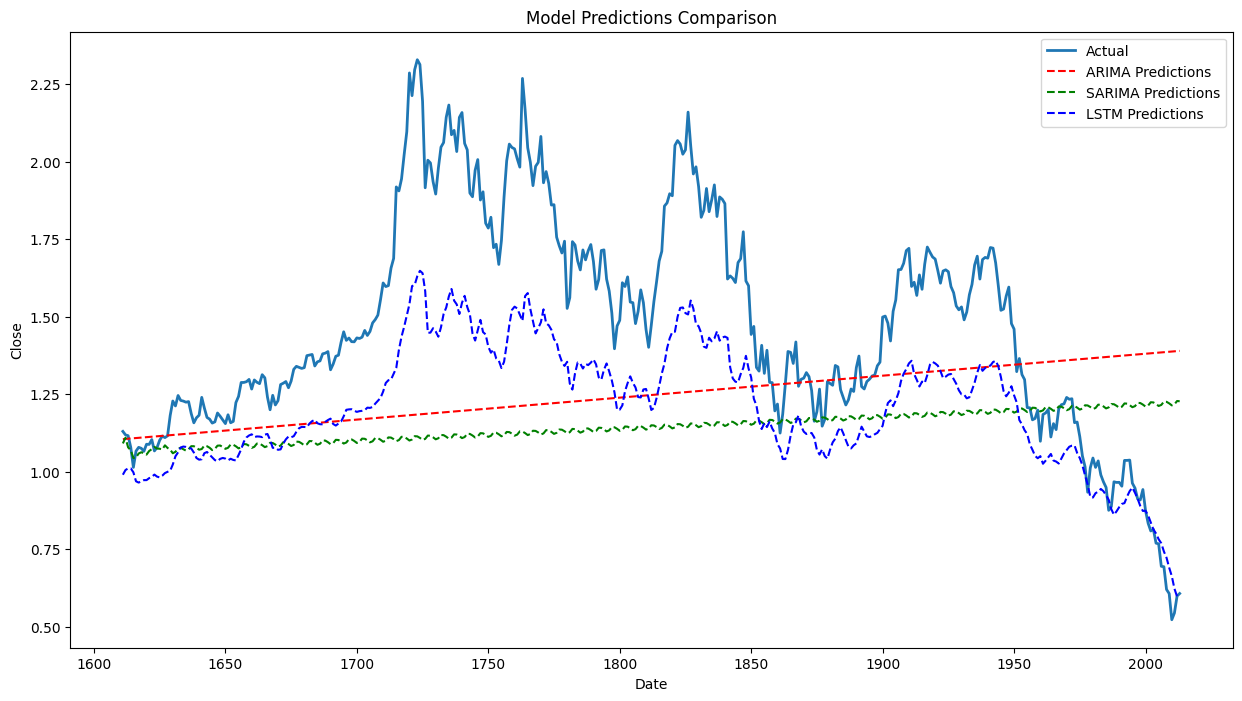

In [12]:
forecaster.plot_results()

In [13]:
forecaster.forecast_future()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

{'LSTM': [0.6033031,
  0.611405,
  0.6200942,
  0.6287064,
  0.6368977,
  0.6444798,
  0.6513586,
  0.65750223,
  0.6629213,
  0.66765505,
  0.6717605,
  0.675305,
  0.6783593,
  0.6809934,
  0.6832737,
  0.6852599,
  0.687005,
  0.6885545,
  0.68994606,
  0.6912105,
  0.6923725,
  0.693451,
  0.6944604,
  0.69541156,
  0.69631207,
  0.6971674,
  0.697981,
  0.6987554,
  0.6994922,
  0.70019233]}